#Simple script to make some plots. Based on Kasper example for DKREA

In [55]:
import Pkg

In [56]:
Pkg.add("Plots")

  Resolving package versions...
No Changes to `/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/sources/julia/.julia/environments/v1.5/Project.toml`
No Changes to `/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/sources/julia/.julia/environments/v1.5/Manifest.toml`


In [57]:
import Base

In [58]:
import DataFrames

In [59]:
import SQLite

In [60]:
import Plots

In [61]:
using Printf

In [62]:
data_path="/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/"

"/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/"

In [63]:
function read_sqlite(file; parameter::String="*", table::String="glatdump", 
        starttime::Int=0, endtime::Int=9999999999, id::Any=-1, printQuery::Bool=false,
                use_custom_query_string::Bool=false, custom_query_string::String="")
    """Function to get data from glatdump sqlite file
    To get all data, parse parameter as *
    If use_custom_query_string is true, everything is ignored,
    except custom query string
    """
    db = SQLite.DB(file)
     if use_custom_query_string 
        query_string = custom_query_string
     else
        query_string = "SELECT " * parameter * " FROM " * table * " WHERE TIME between " *
                       string(starttime) * " AND " * string(endtime) 
        if id != -1

            if id isa Tuple
                query_string *= " AND ID between " * string(id[1]) * " AND " * string(id[2])
            else
                query_string *= " AND ID="*string(id)
            end

        end
     end    
     if printQuery
        println(query_string)
    end
        
    df = SQLite.DBInterface.execute(db, query_string) |> DataFrames.DataFrame
      
    return df
end    

read_sqlite (generic function with 1 method)

In [64]:
qs = "SELECT ID, TIME, DATETIME,MEAS FROM glatdump" #contains only one station

"SELECT ID, TIME, DATETIME,MEAS FROM glatdump"

In [65]:
#NOTE: this file contains ONLY observations with bufr id 12200 (road temperature)

In [66]:
obs_db=joinpath(data_path,"glatmodel_obs/sql_dbs/dump_12200_20190909090000_20190930230000.db")

"/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/glatmodel_obs/sql_dbs/dump_12200_20190909090000_20190930230000.db"

In [67]:
fcst_db=joinpath(data_path,"glatmodel_fcst/sql_dbs/dump_20190909090000_20190930230000.db")

"/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/glatmodel_fcst/sql_dbs/dump_20190909090000_20190930230000.db"

In [68]:
df_obs = read_sqlite(obs_db, 
                printQuery=true,
                use_custom_query_string=true,
                custom_query_string=qs);

SELECT ID, TIME, DATETIME,MEAS FROM glatdump


In [28]:
df_obs 

,ID,TIME,DATETIME,MEAS
,Int64,Int64,String,Float64
1,1000,201909090530,2019-09-09 05:30:00.000,12.0
2,1000,201909090535,2019-09-09 05:35:00.000,12.1
3,1000,201909090540,2019-09-09 05:40:00.000,12.1
4,1000,201909090545,2019-09-09 05:45:00.000,12.2
5,1000,201909090550,2019-09-09 05:50:00.000,12.3
6,1000,201909090555,2019-09-09 05:55:00.000,12.4
7,1000,201909090600,2019-09-09 06:00:00.000,12.5
8,1000,201909090605,2019-09-09 06:05:00.000,12.8
9,1000,201909090610,2019-09-09 06:10:00.000,12.9


In [69]:
qs_fcst = "SELECT ID, VALID_DATE, DATETIME,ROAD_TEMPERATURE FROM fild7"

"SELECT ID, VALID_DATE, DATETIME,ROAD_TEMPERATURE FROM fild7"

In [70]:
df_fcst = read_sqlite(fcst_db, 
                printQuery=true,table="fild7",
                use_custom_query_string=true,
                custom_query_string=qs_fcst)

SELECT ID, VALID_DATE, DATETIME,ROAD_TEMPERATURE FROM fild7


,ID,VALID_DATE,DATETIME,ROAD_TEMPERATURE
,Int64,Int64,String,Float64
1,100000,201909090930,2019-09-09 09:30:00.000,22.97
2,100000,201909091000,2019-09-09 10:00:00.000,24.03
3,100000,201909091030,2019-09-09 10:30:00.000,23.91
4,100000,201909091100,2019-09-09 11:00:00.000,24.47
5,100000,201909091130,2019-09-09 11:30:00.000,22.13
6,100000,201909091200,2019-09-09 12:00:00.000,21.58
7,100000,201909091230,2019-09-09 12:30:00.000,20.71
8,100000,201909091300,2019-09-09 13:00:00.000,20.38
9,100000,201909091330,2019-09-09 13:30:00.000,20.46


In [71]:
df_fcst.ID = div.(df_fcst.ID,1000) #take integer division of all elements

795936-element Array{Int64,1}:
 100
 100
 100
 100
 100
 100
 100
 100
 100
 100
 100
 100
 100
   ⋮
 990
 990
 990
 990
 990
 990
 990
 990
 991
 991
 991
 991

In [107]:
import Dates

In [121]:
function get_time_and_temp(df)
    # Divide DataFrame into many SubDataFrames organised by DATETIME
    ds = DataFrames.groupby(df, :DATETIME)
    #print("Groupping ",ds)

    timeslots = length(ds)
    time = zeros(Dates.DateTime, timeslots)
    temperature = zeros(Float64, timeslots)

    for k in 1:timeslots
      time[k] = Dates.DateTime(ds[k]["DATETIME"][1],"yyyy-mm-dd HH:MM:SS.SSS")
      #time[k] = Dates.unix2datetime(ds[k]["DATETIME"][1])
      temperature[k] = ds[k]["MEAS"][1]
    end
    return time, temperature
end

get_time_and_temp (generic function with 1 method)

In [122]:
#p1 = plot(df_GLAT[from:to], df_GLAT, xlabel="Date", ylabel="Wind [m/s]", legend=:topleft, label=@sprintf("DKREA (RMSE: %5.2f m/s)", DKREA_wind_rmse), title="October 2013, \"Allan\"")
#plot!(ERA5_time[from:to], ERA5_wind[from:to], label=@sprintf("ERA5 (RMSE: %5.2f m/s)", ERA5_wind_rmse))

In [123]:
#get_time_and_temp(df_GLAT)

In [124]:
time_obs,temp_obs = get_time_and_temp(df_obs)

([Dates.DateTime("2019-09-09T05:30:00"), Dates.DateTime("2019-09-09T05:35:00"), Dates.DateTime("2019-09-09T05:40:00"), Dates.DateTime("2019-09-09T05:45:00"), Dates.DateTime("2019-09-09T05:50:00"), Dates.DateTime("2019-09-09T05:55:00"), Dates.DateTime("2019-09-09T06:00:00"), Dates.DateTime("2019-09-09T06:05:00"), Dates.DateTime("2019-09-09T06:10:00"), Dates.DateTime("2019-09-09T06:15:00")  …  Dates.DateTime("2019-09-22T05:16:00"), Dates.DateTime("2019-09-22T04:31:00"), Dates.DateTime("2019-09-22T05:11:00"), Dates.DateTime("2019-09-22T04:36:00"), Dates.DateTime("2019-09-22T04:41:00"), Dates.DateTime("2019-09-22T04:46:00"), Dates.DateTime("2019-09-22T04:56:00"), Dates.DateTime("2019-09-22T05:01:00"), Dates.DateTime("2019-09-22T05:06:00"), Dates.DateTime("2019-09-22T04:51:00")], [12.0, 12.1, 12.1, 12.2, 12.3, 12.4, 12.5, 12.8, 12.9, 13.0  …  11.6, 7.9, 6.7, 4.6, 4.8, 4.9, 4.8, 5.0, 4.9, 13.9011])

In [125]:
time_obs

8007-element Array{Dates.DateTime,1}:
 2019-09-09T05:30:00
 2019-09-09T05:35:00
 2019-09-09T05:40:00
 2019-09-09T05:45:00
 2019-09-09T05:50:00
 2019-09-09T05:55:00
 2019-09-09T06:00:00
 2019-09-09T06:05:00
 2019-09-09T06:10:00
 2019-09-09T06:15:00
 2019-09-09T06:20:00
 2019-09-09T06:25:00
 2019-09-09T06:30:00
 ⋮
 2019-09-22T05:15:00
 2019-09-22T05:20:00
 2019-09-22T05:16:00
 2019-09-22T04:31:00
 2019-09-22T05:11:00
 2019-09-22T04:36:00
 2019-09-22T04:41:00
 2019-09-22T04:46:00
 2019-09-22T04:56:00
 2019-09-22T05:01:00
 2019-09-22T05:06:00
 2019-09-22T04:51:00

In [126]:
df_obs.DATETIME[1:10]

10-element Array{String,1}:
 "2019-09-09 05:30:00.000"
 "2019-09-09 05:35:00.000"
 "2019-09-09 05:40:00.000"
 "2019-09-09 05:45:00.000"
 "2019-09-09 05:50:00.000"
 "2019-09-09 05:55:00.000"
 "2019-09-09 06:00:00.000"
 "2019-09-09 06:05:00.000"
 "2019-09-09 06:10:00.000"
 "2019-09-09 06:15:00.000"

In [127]:
df_obs[1:10,:]

,ID,TIME,DATETIME,MEAS
,Int64,Int64,String,Float64
1,1000,201909090530,2019-09-09 05:30:00.000,12.0
2,1000,201909090535,2019-09-09 05:35:00.000,12.1
3,1000,201909090540,2019-09-09 05:40:00.000,12.1
4,1000,201909090545,2019-09-09 05:45:00.000,12.2
5,1000,201909090550,2019-09-09 05:50:00.000,12.3
6,1000,201909090555,2019-09-09 05:55:00.000,12.4
7,1000,201909090600,2019-09-09 06:00:00.000,12.5
8,1000,201909090605,2019-09-09 06:05:00.000,12.8
9,1000,201909090610,2019-09-09 06:10:00.000,12.9


In [128]:
#ds = DataFrames.groupby(df_obs[1:10,:], :DATETIME)

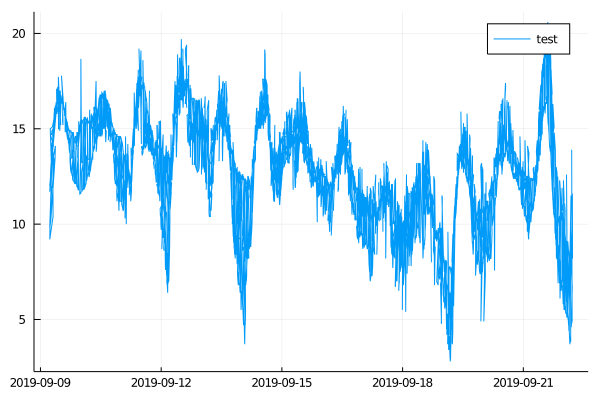

In [133]:
Plots.plot!(time_obs, temp_obs, label="test")

LoadError: ArgumentError: Package Plot not found in current path:
- Run `import Pkg; Pkg.add("Plot")` to install the Plot package.


In [134]:
function get_time_and_temp_fcst(df)
    # Divide DataFrame into many SubDataFrames organised by DATETIME
    ds = DataFrames.groupby(df, :DATETIME)
    #print("Groupping ",ds)

    timeslots = length(ds)
    time = zeros(Dates.DateTime, timeslots)
    temperature = zeros(Float64, timeslots)

    for k in 1:timeslots
      time[k] = Dates.DateTime(ds[k]["DATETIME"][1],"yyyy-mm-dd HH:MM:SS.SSS")
      #time[k] = Dates.unix2datetime(ds[k]["DATETIME"][1])
      temperature[k] = ds[k]["ROAD_TEMPERATURE"][1]
    end
    return time, temperature
end

get_time_and_temp_fcst (generic function with 1 method)

In [135]:
time_fcst,temp_fcst = get_time_and_temp_fcst(df_fcst)

([Dates.DateTime("2019-09-09T09:30:00"), Dates.DateTime("2019-09-09T10:00:00"), Dates.DateTime("2019-09-09T10:30:00"), Dates.DateTime("2019-09-09T11:00:00"), Dates.DateTime("2019-09-09T11:30:00"), Dates.DateTime("2019-09-09T12:00:00"), Dates.DateTime("2019-09-09T12:30:00"), Dates.DateTime("2019-09-09T13:00:00"), Dates.DateTime("2019-09-09T13:30:00"), Dates.DateTime("2019-09-09T14:00:00")  …  Dates.DateTime("2019-10-01T17:30:00"), Dates.DateTime("2019-10-01T18:00:00"), Dates.DateTime("2019-10-01T18:30:00"), Dates.DateTime("2019-10-01T19:00:00"), Dates.DateTime("2019-10-01T19:30:00"), Dates.DateTime("2019-10-01T20:00:00"), Dates.DateTime("2019-10-01T20:30:00"), Dates.DateTime("2019-10-01T21:00:00"), Dates.DateTime("2019-10-01T21:30:00"), Dates.DateTime("2019-10-01T22:00:00")], [22.97, 24.03, 23.91, 24.47, 22.13, 21.58, 20.71, 20.38, 20.46, 20.29  …  9.88, 9.53, 8.28, 7.99, 7.45, 7.2, 6.92, 6.71, 6.52, 6.34])

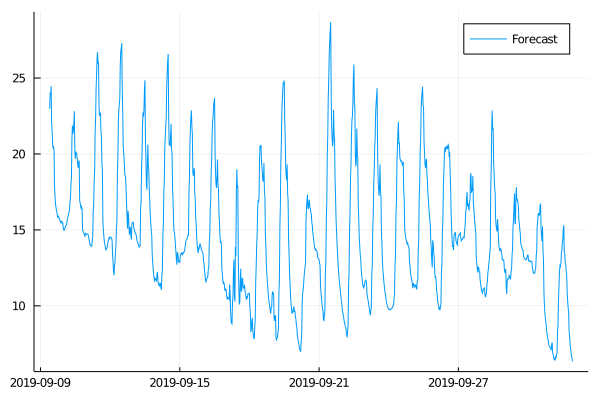

In [138]:
p1 = Plots.plot(time_fcst,temp_fcst,label="Forecast")

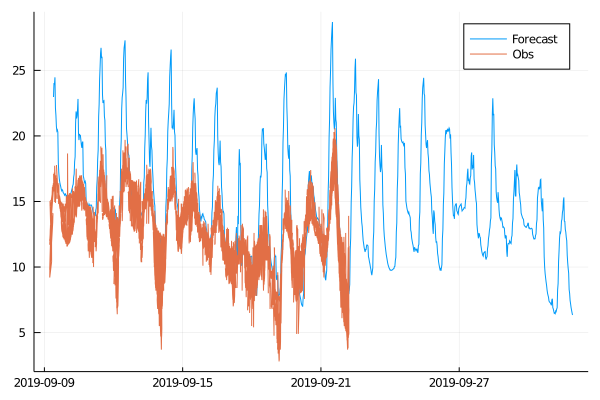

In [139]:
Plots.plot!(time_obs, temp_obs, label="Obs")

In [144]:
Pkg.add("Gadfly")

  Resolving package versions...
  Installed IndirectArrays ─────────────── v0.5.1
  Installed PDMats ─────────────────────── v0.10.1
  Installed AxisAlgorithms ─────────────── v1.0.0
  Installed MKL_jll ────────────────────── v2020.2.254+0
  Installed KernelDensity ──────────────── v0.6.2
  Installed OpenSpecFun_jll ────────────── v0.5.3+4
  Installed Gadfly ─────────────────────── v1.3.1
  Installed Ratios ─────────────────────── v0.4.0
  Installed FFTW ───────────────────────── v1.2.4
  Installed AbstractFFTs ───────────────── v0.5.0
  Installed Distributions ──────────────── v0.23.12
  Installed Juno ───────────────────────── v0.8.4
  Installed CoupledFields ──────────────── v0.2.0
  Installed FillArrays ─────────────────── v0.9.7
  Installed Compose ────────────────────── v0.9.1
  Installed Rmath_jll ──────────────────── v0.2.2+1
  Installed Media ──────────────────────── v0.5.0
  Installed Rmath ──────────────────────── v0.6.1
  Installed OffsetArrays ───────────────── v1.4.1
  In

In [145]:
import Gadfly

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1278


LoadError: MethodError: no method matching stack(::Array{Dates.DateTime,1}, ::Array{Float64,1})
Closest candidates are:
  stack(!Matched::DataFrames.AbstractDataFrame, ::Any) at /media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/sources/julia/.julia/packages/DataFrames/GtZ1l/src/abstractdataframe/reshape.jl:54
  stack(!Matched::DataFrames.AbstractDataFrame, ::Any, !Matched::Any; variable_name, value_name, view, variable_eltype) at /media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/sources/julia/.julia/packages/DataFrames/GtZ1l/src/abstractdataframe/reshape.jl:54